Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Activation,Layer,Lambda
import seaborn as sns
from sklearn.decomposition import PCA

Import Dataset

In [2]:
GT = pd.read_csv("gas_turbines.csv")

In [3]:
GT1=GT.copy()

In [4]:
GT1

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [5]:
GT1.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [6]:
GT1.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,15039.0,17.764381,7.574323,0.522300,11.408000,18.1860,23.8625,34.9290
AP,15039.0,1013.199240,6.410760,985.850000,1008.900000,1012.8000,1016.9000,1034.2000
AH,15039.0,79.124174,13.793439,30.344000,69.750000,82.2660,90.0435,100.2000
AFDP,15039.0,4.200294,0.760197,2.087400,3.723900,4.1862,4.5509,7.6106
GTEP,15039.0,25.419061,4.173916,17.878000,23.294000,25.0820,27.1840,37.4020
TIT,15039.0,1083.798770,16.527806,1000.800000,1079.600000,1088.7000,1096.0000,1100.8000
TAT,15039.0,545.396183,7.866803,512.450000,542.170000,549.8900,550.0600,550.6100
TEY,15039.0,134.188464,15.829717,100.170000,127.985000,133.7800,140.8950,174.6100
CDP,15039.0,12.102353,1.103196,9.904400,11.622000,12.0250,12.5780,15.0810
CO,15039.0,1.972499,2.222206,0.000388,0.858055,1.3902,2.1604,44.1030


Visualizations

<Axes: >

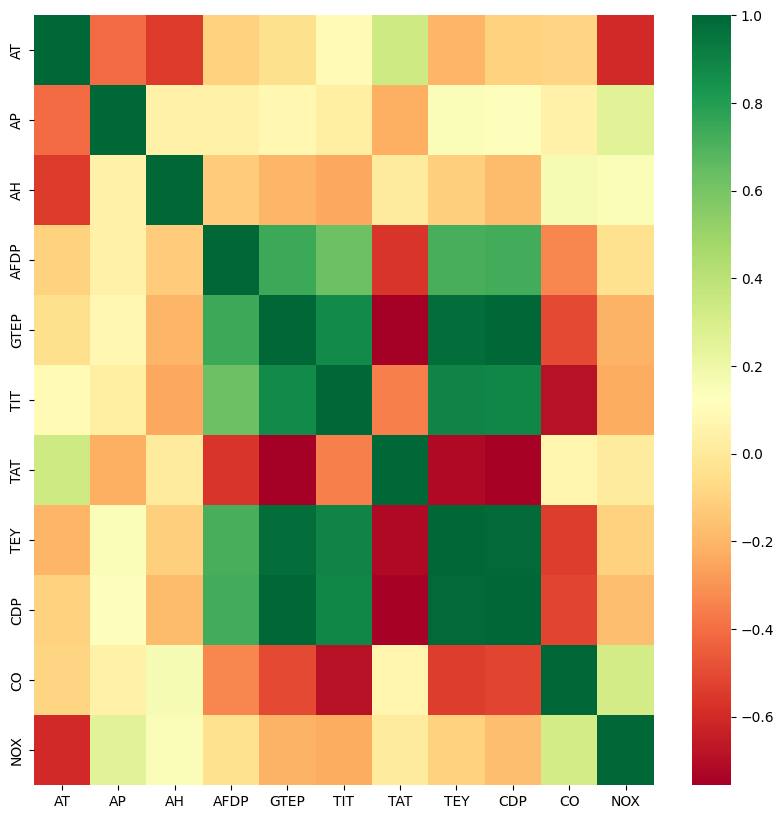

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(GT1.corr(),cmap="RdYlGn")

(array([ 236., 1297., 1877., 2005., 1880., 2190., 2278., 1884., 1088.,
         304.]),
 array([ 0.5223 ,  3.96297,  7.40364, 10.84431, 14.28498, 17.72565,
        21.16632, 24.60699, 28.04766, 31.48833, 34.929  ]),
 <BarContainer object of 10 artists>)

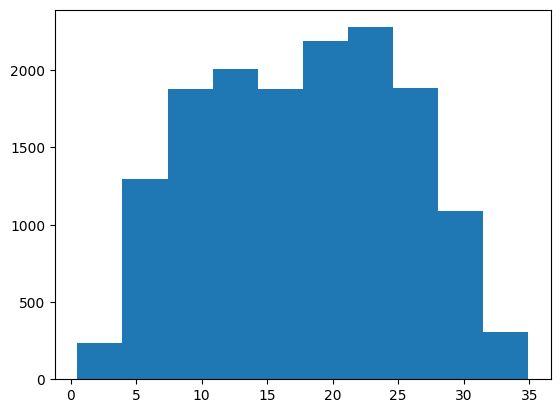

In [8]:
# Graphical Representation of data
# Histogram
plt.hist(GT1['AT'])

(array([  29.,   47.,  206.,  973., 3477., 4783., 3086., 1668.,  697.,
          73.]),
 array([ 985.85 ,  990.685,  995.52 , 1000.355, 1005.19 , 1010.025,
        1014.86 , 1019.695, 1024.53 , 1029.365, 1034.2  ]),
 <BarContainer object of 10 artists>)

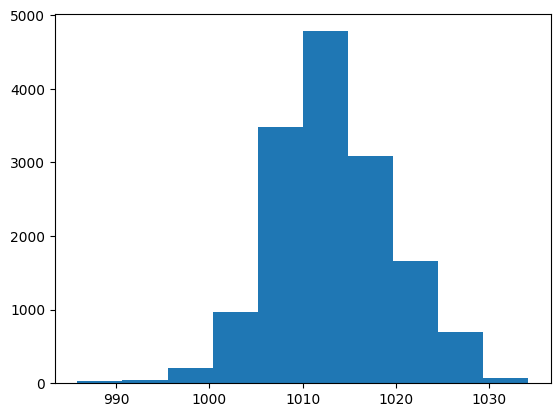

In [9]:
plt.hist(GT1['AP'])

(array([  26.,  145.,  425.,  864., 1296., 1660., 2036., 2799., 3716.,
        2072.]),
 array([ 30.344 ,  37.3296,  44.3152,  51.3008,  58.2864,  65.272 ,
         72.2576,  79.2432,  86.2288,  93.2144, 100.2   ]),
 <BarContainer object of 10 artists>)

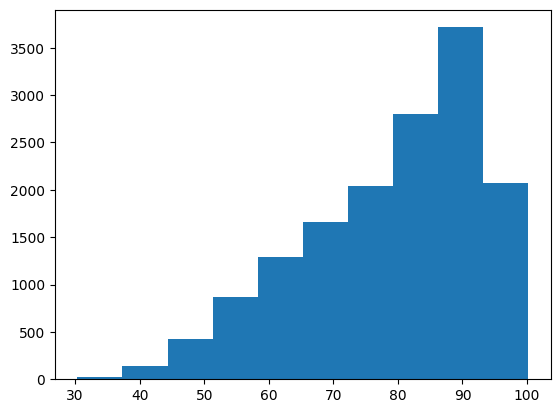

In [10]:
plt.hist(GT1['AH'])

In [11]:
GTa = GT1[GT1.columns[0:10]]
month_colum = GTa.select_dtypes(include='object').columns.tolist()

In [12]:
plt.figure(figsize=(16,10))
for i,col in enumerate(month_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=GTa,y=col)
    plt.subplot(2,2,i+2)
    GT1[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

<Figure size 1600x1000 with 0 Axes>

In [13]:
num_columns = GTa.select_dtypes(exclude='object').columns.tolist()

<ipython-input-14-0ff993730e01>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(GT[col],color='g',shade=True)
<ipython-input-14-0ff993730e01>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(GT[col],color='g',shade=True)
<ipython-input-14-0ff993730e01>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(GT[col],color='g',shade=True)
<ipython-input-14-0ff993730e01>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(GT[col],color='g',shade=True)
<ipython-input-14-0ff993730e01>:4: FutureWarning: 

`shade` 

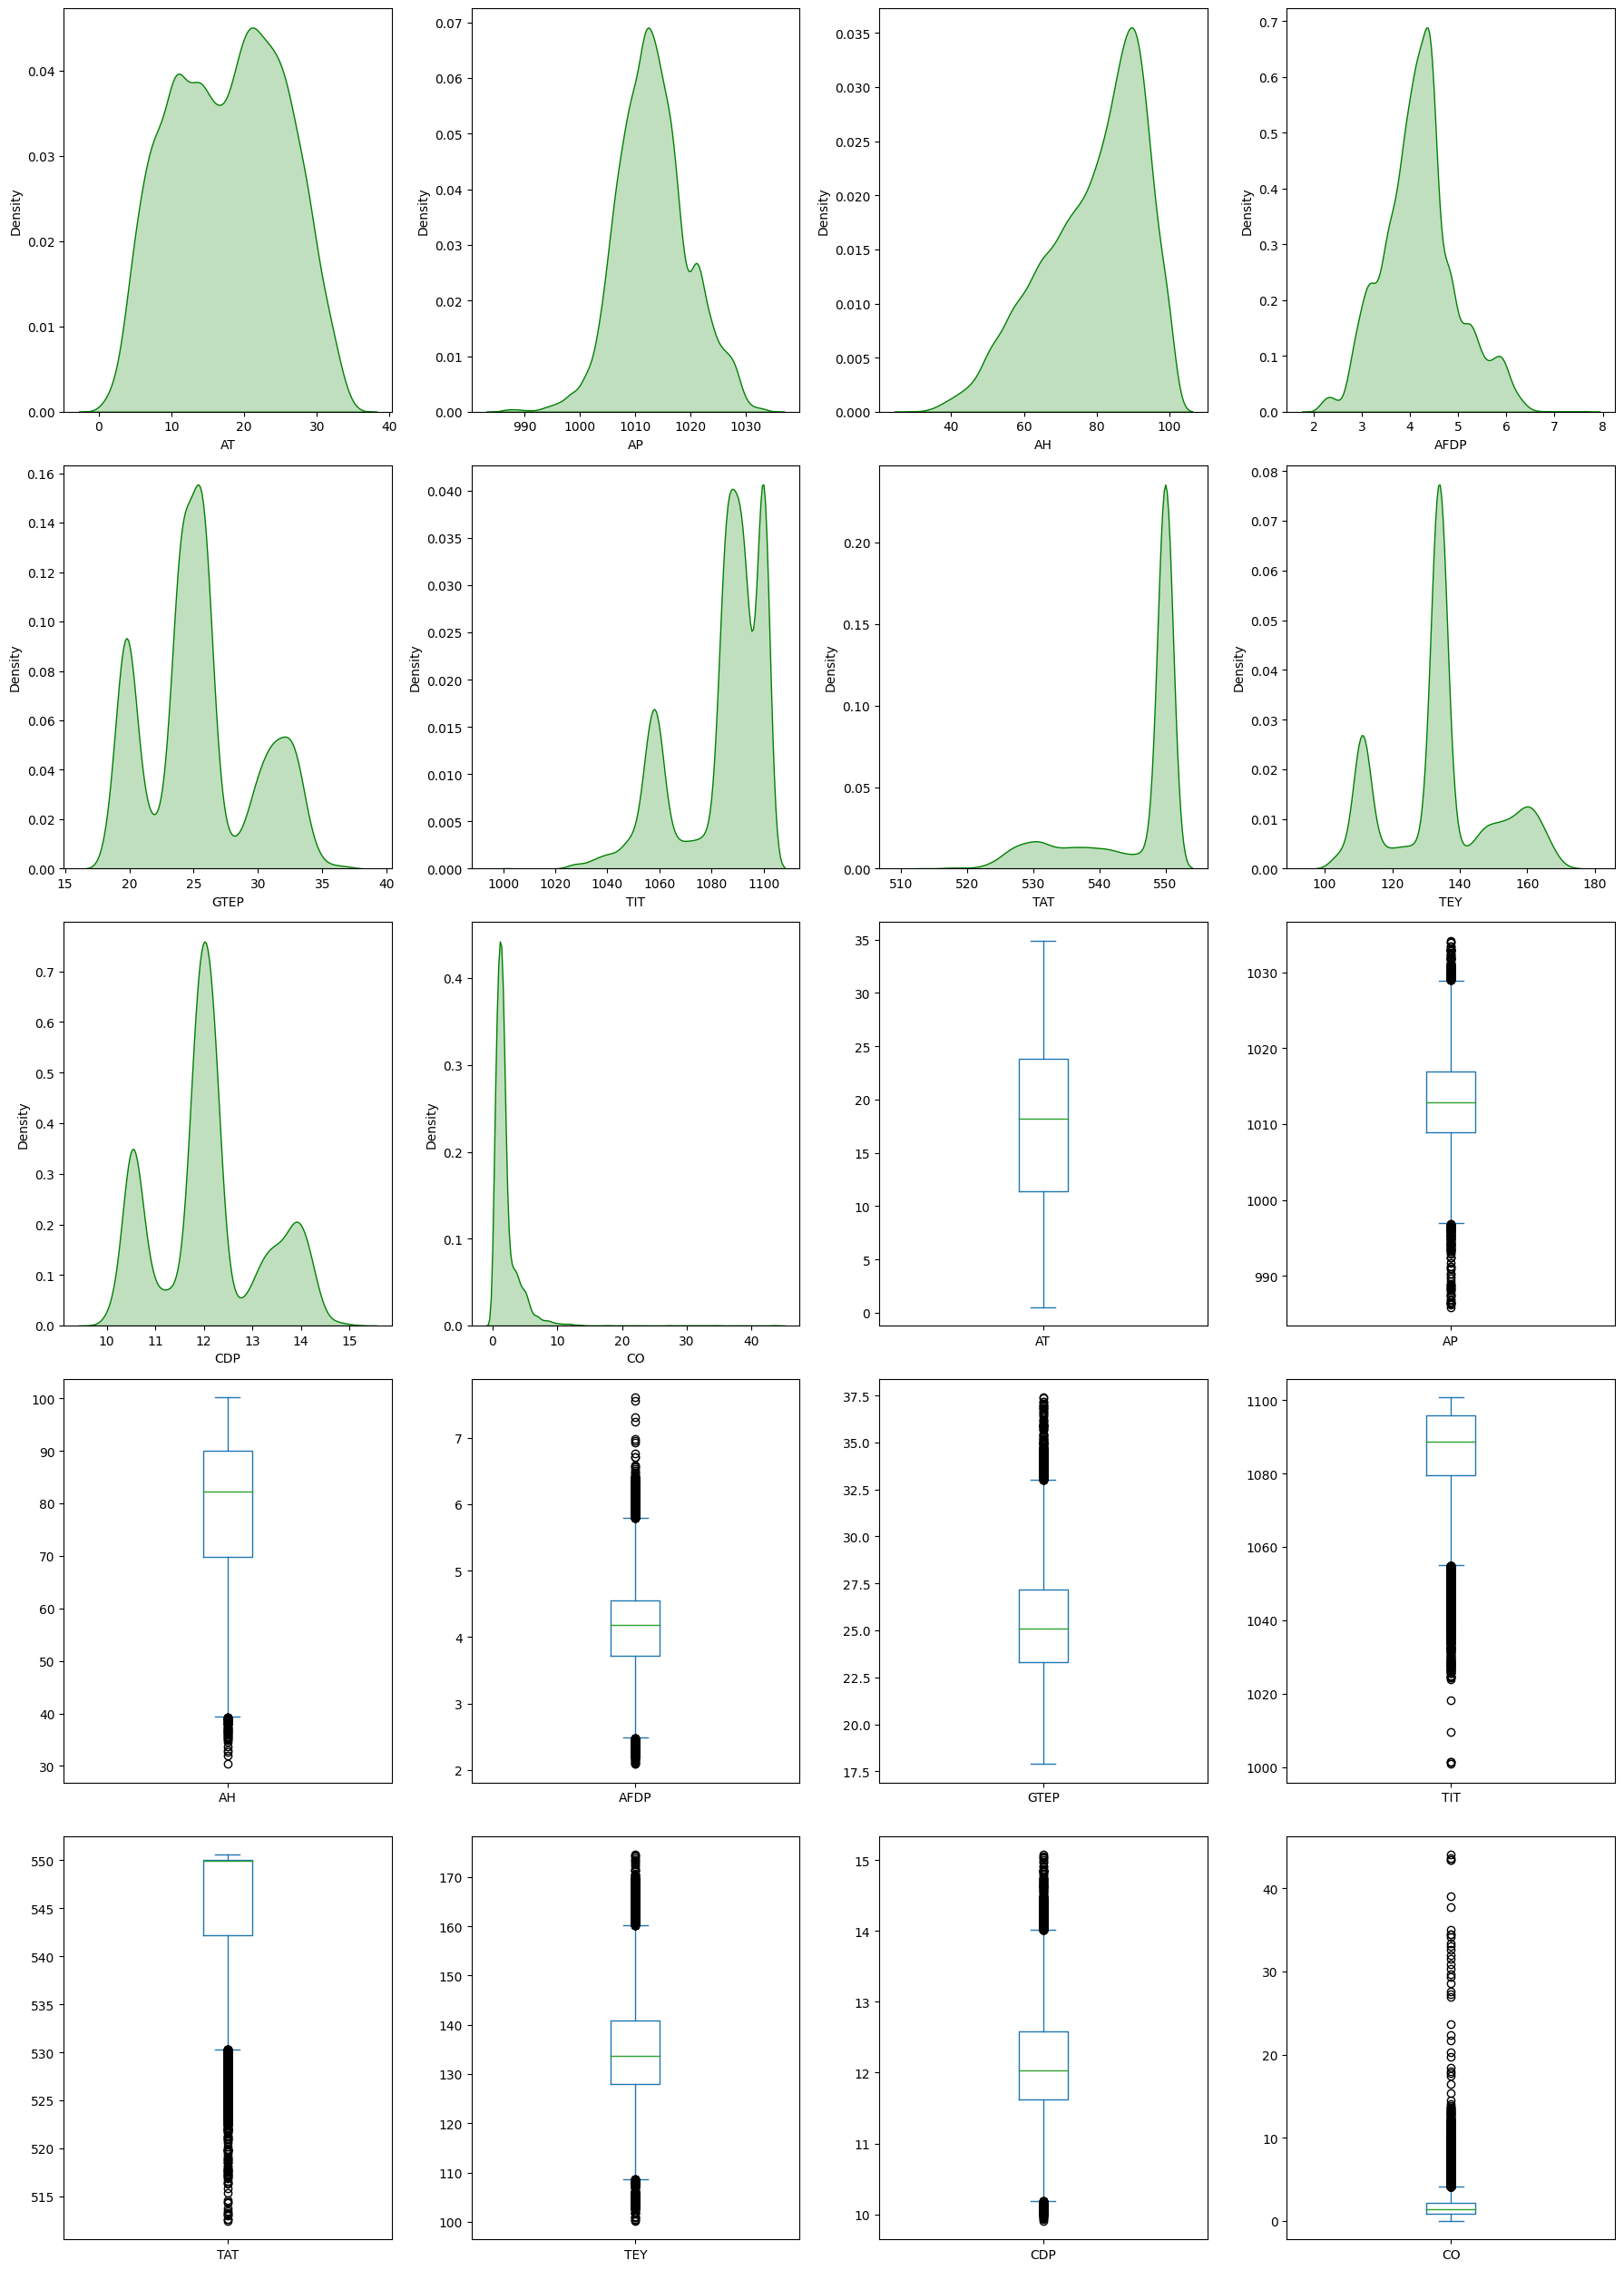

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO
skewness,-0.030710,0.107601,-0.681224,0.315150,0.370987,-1.133744,-1.485524,0.145963,0.263042,6.534577
kurtosis,-0.987597,0.424070,-0.282476,0.281642,-0.618358,0.375232,0.847637,-0.487058,-0.589420,82.518116


In [14]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(GT[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    GT[col].plot.box()
plt.tight_layout()
plt.show()
num_data = GT[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

Finding Correlation

In [15]:
corr = GT1[GT1.columns[0:11]].corr()

<Axes: >

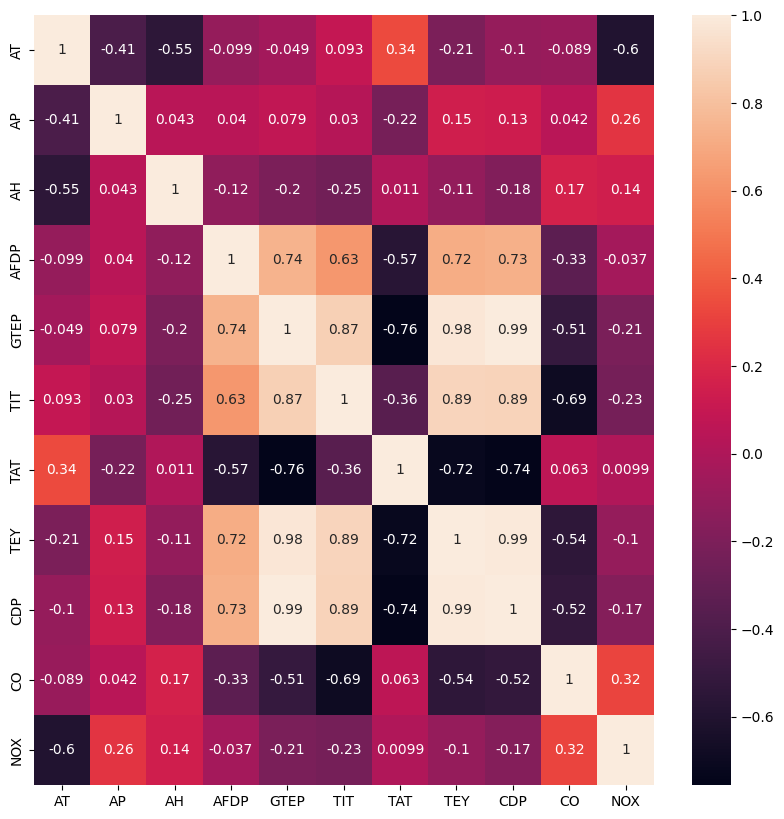

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

Neural Network Model

In [17]:
def prep_model(hidden_dim):
    model = Sequential()
    for i in range(1,len(hidden_dim)-1):
        if (i==1):
            model.add(Dense(hidden_dim[i],input_dim=hidden_dim[0],kernel_initializer="normal",activation="relu"))
        else:
            model.add(Dense(hidden_dim[i],activation="relu"))
    model.add(Dense(hidden_dim[-1]))
    model.compile(loss="mean_squared_error",optimizer="adam",metrics = ["accuracy"])
    return (model)

In [18]:
column_names = list(GT1.columns)
predictors = column_names[0:8]
target = column_names[8]

In [19]:
first_model = prep_model([8,50,1])
first_model.fit(np.array(GT1[predictors]),np.array(GT1[target]),epochs=150)
pred_train = first_model.predict(np.array(GT1[predictors]))
pred_train = pd.Series([i[0] for i in pred_train])
rmse_value = np.sqrt(np.mean((pred_train-GT1[target])**2))


Epoch 1/150
470/470 [==============================] - 4s 5ms/step - loss: 28.5987 - accuracy: 0.0000e+00
Epoch 2/150
470/470 [==============================] - 1s 2ms/step - loss: 0.3164 - accuracy: 0.0000e+00
Epoch 3/150
470/470 [==============================] - 1s 2ms/step - loss: 0.0196 - accuracy: 0.0000e+00
Epoch 4/150
470/470 [==============================] - 1s 2ms/step - loss: 0.0137 - accuracy: 0.0000e+00
Epoch 5/150
470/470 [==============================] - 1s 2ms/step - loss: 0.0135 - accuracy: 0.0000e+00
Epoch 6/150
470/470 [==============================] - 1s 2ms/step - loss: 0.0145 - accuracy: 0.0000e+00
Epoch 7/150
470/470 [==============================] - 1s 2ms/step - loss: 0.0160 - accuracy: 0.0000e+00
Epoch 8/150
470/470 [==============================] - 1s 3ms/step - loss: 0.0164 - accuracy: 0.0000e+00
Epoch 9/150
470/470 [==============================] - 1s 3ms/step - loss: 0.0242 - accuracy: 0.0000e+00
Epoch 10/150
470/470 [==============================] 

array([[1.        , 0.99790406],
       [0.99790406, 1.        ]])

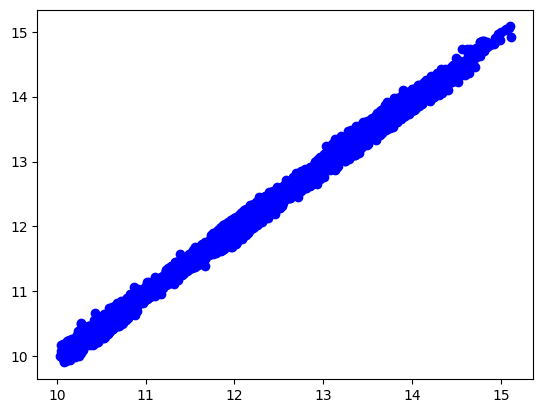

In [20]:
import matplotlib.pyplot as plt
plt.plot(pred_train,GT1[target],"bo")
np.corrcoef(pred_train,GT1[target]) # we got high correlation
